In [1]:
# import the necessary packages 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec 

In [7]:
# Load the dataset from the csv file using pandas 

data = pd.read_csv("creditcard.csv") 


In [12]:
# Grab a peek at the data 

data.head() 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
# Describing the data

print(data.shape) 
print(data.describe()) 


(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [98]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

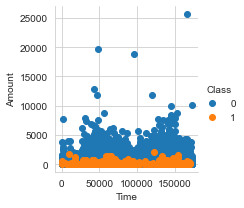

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class").map(plt.scatter, "Time", "Amount").add_legend()
plt.show()


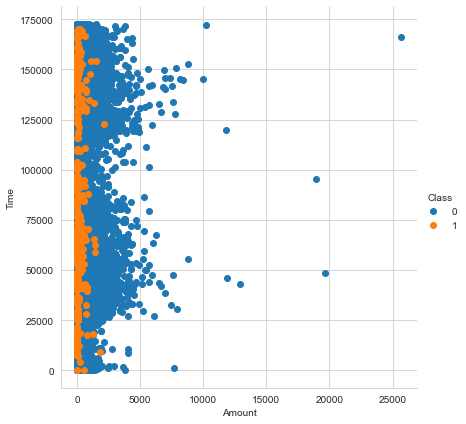

In [100]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Amount", "Time").add_legend()
plt.show()

In [101]:
# Observations:

#1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction
#   amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.

#2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

In [30]:
FilteredData = data[['Time','Amount', 'Class']]

In [31]:
FilteredData 

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


In [32]:
print(FilteredData.shape)

(284807, 3)


In [33]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

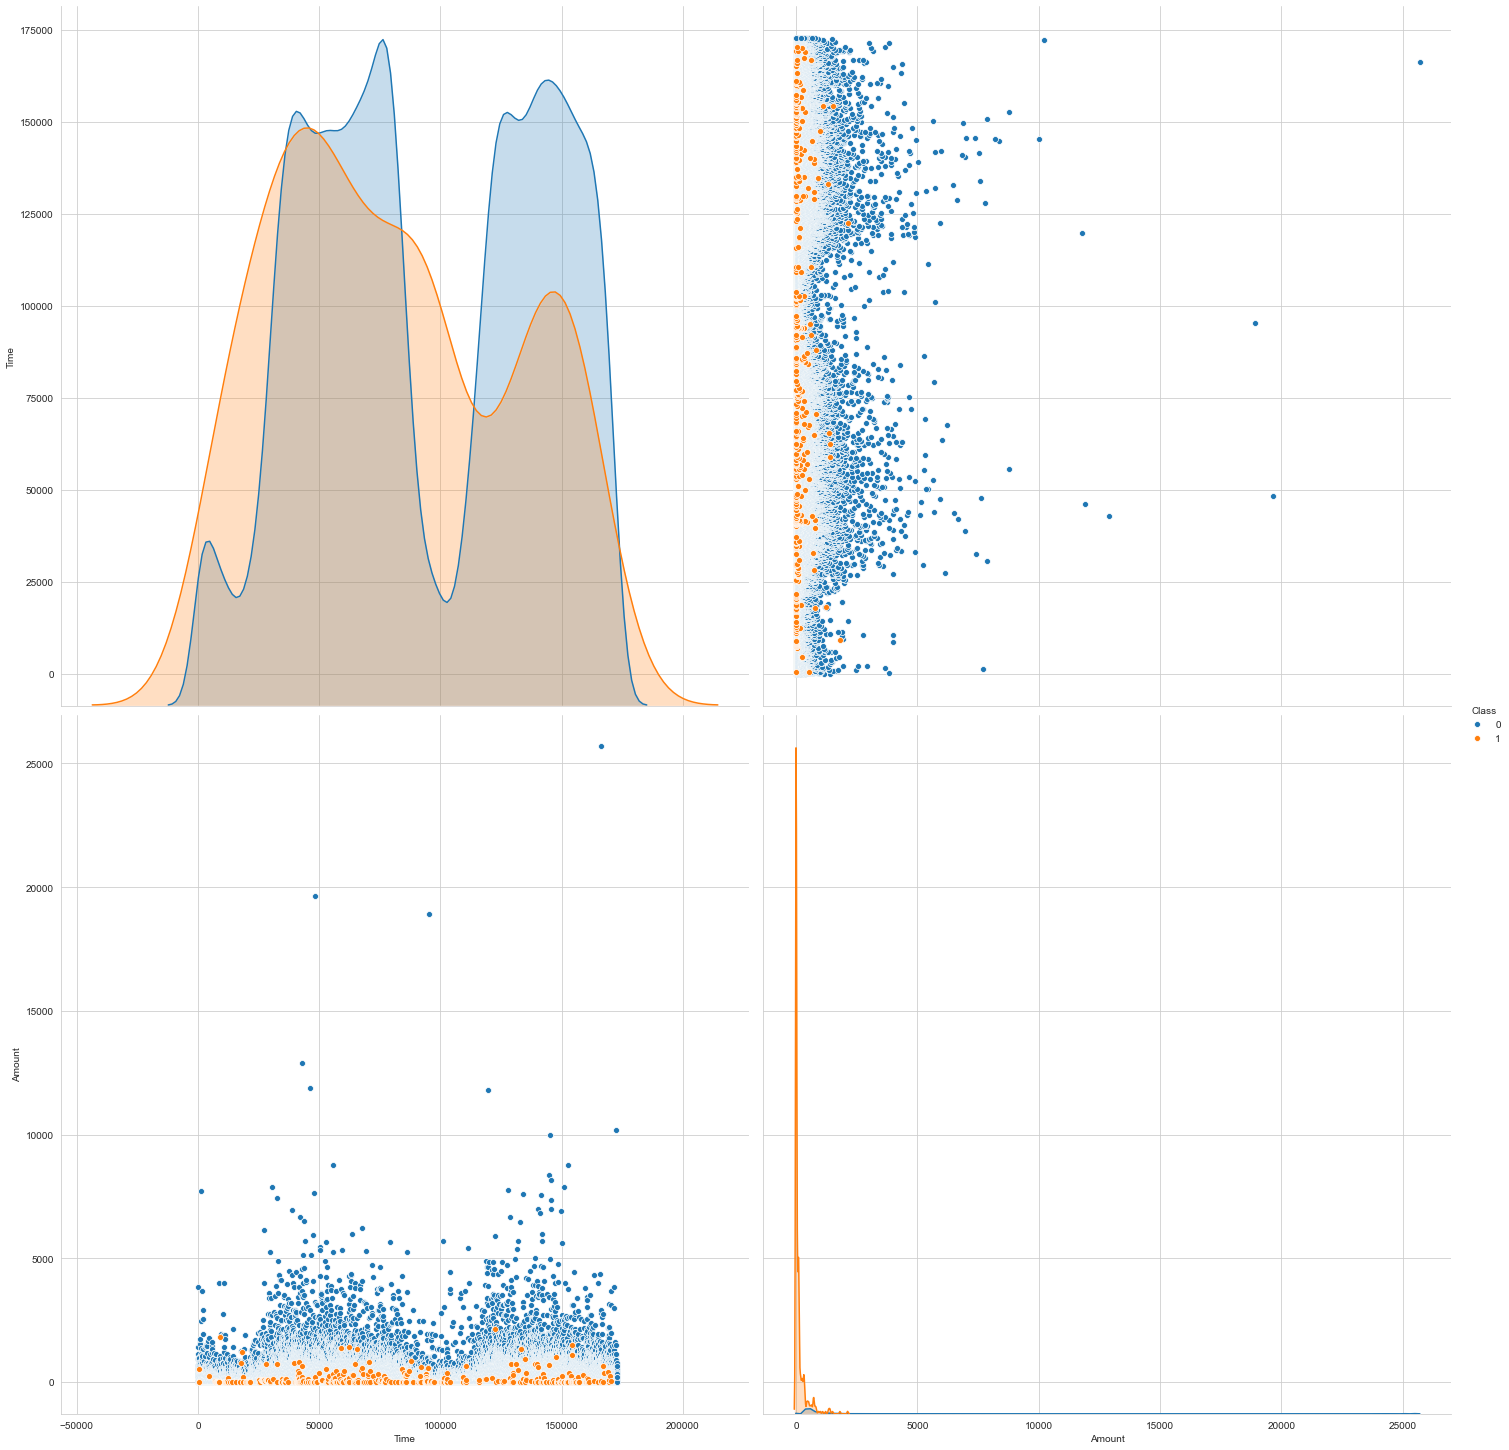

In [45]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(FilteredData, hue="Class", height=10);
plt.show()


In [35]:
countLess = 0
countMore= 0
for i in range(284806):
    if(FilteredData.iloc[i]["Amount"] < 2500):
        countLess = countLess + 1
    else:
        countMore = countMore + 1
print(countLess)
print(countMore)

284357
449


In [36]:
FilteredData["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

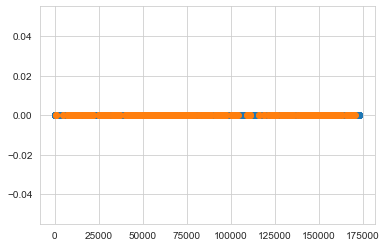

In [37]:
creditCard_genuine = FilteredData.loc[FilteredData["Class"] == 0]
creditCard_fraud = FilteredData.loc[FilteredData["Class"] == 1]

plt.plot(creditCard_genuine["Time"], np.zeros_like(creditCard_genuine["Time"]), "o")
plt.plot(creditCard_fraud["Time"], np.zeros_like(creditCard_fraud["Time"]), "o")

plt.show()

#X-axis: Time

#Observations: Fraud and genuine transactions are spread evenly thought time and there is no clear distinction.


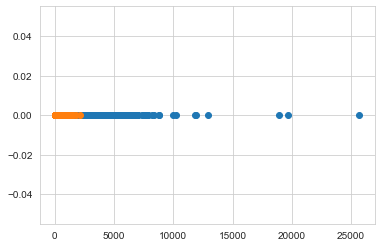

In [38]:
plt.plot(creditCard_genuine["Amount"], np.zeros_like(creditCard_genuine["Amount"]), "o")
plt.plot(creditCard_fraud["Amount"], np.zeros_like(creditCard_fraud["Amount"]), "o")

plt.show()
#X-axis: Amount

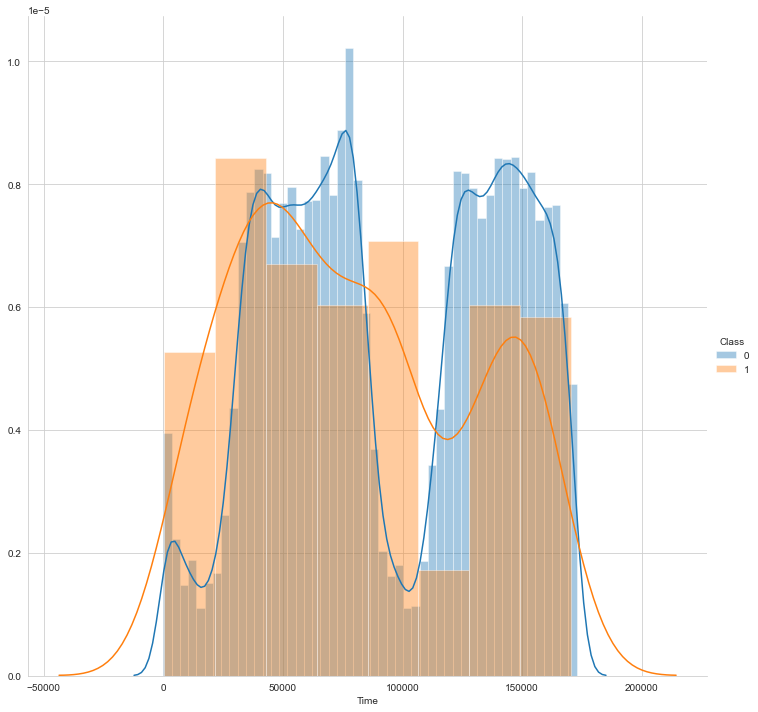

In [44]:
sns.FacetGrid(FilteredData, hue="Class", height=10).map(sns.distplot, "Time").add_legend()
plt.show()

#Observations:There is a heavy overlap of genuine and fraud transactions throughout the time and there is no clear distinction.

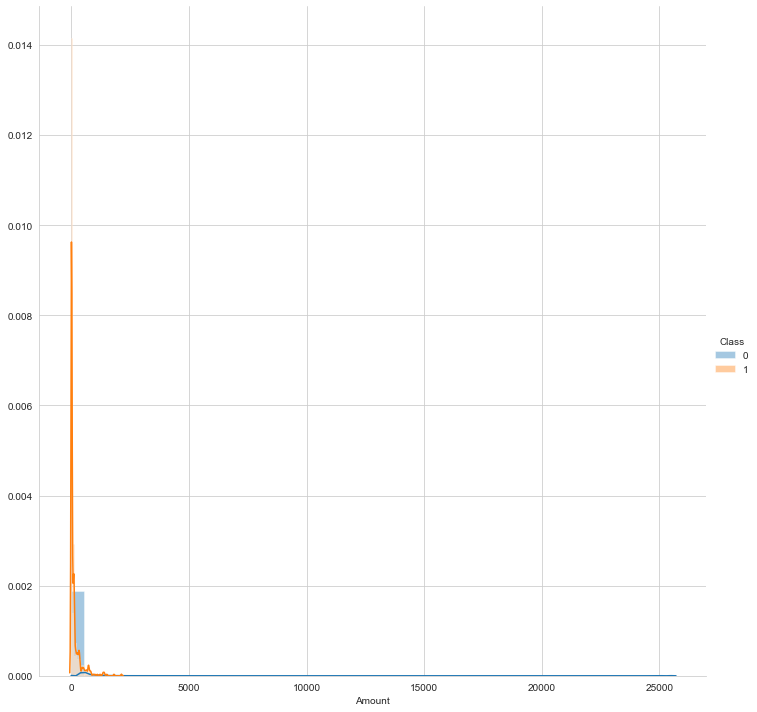

In [43]:
sns.FacetGrid(FilteredData, hue="Class", height=10).map(sns.distplot, "Amount").add_legend()
plt.show()

# Observations:Most of the transaction have amount less than 2500 approximately and all of the fraud transactions have transaction amount less than 2500. There is no fraud transaction of transaction amount greater than 2500.

#Hence, this is the best histogram we have

In [116]:
# Determine number of fraud cases in dataset 

fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print(outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0]))) 


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [117]:
# print the amount details of fraudulent transaction.

print("Amount details of the fraudulent transaction") 
fraud.Amount.describe() 

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [118]:
# print the amount details of normal transaction.

print("details of valid transaction") 
valid.Amount.describe() 


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

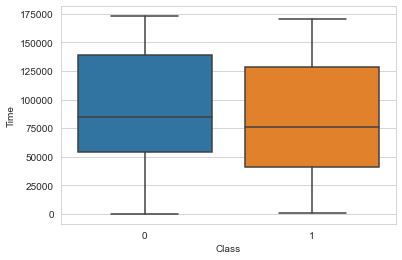

In [119]:
sns.boxplot(x = "Class", y = "Time", data = data)
plt.show()

# Observations:By looking at the above box plot we can say that both fraud & genuine transactions occur throughout time and
# there is no distinction between them.

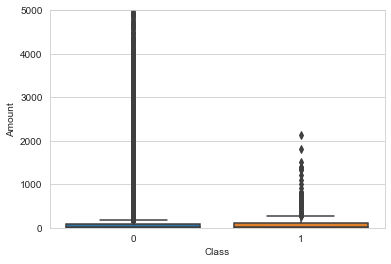

In [120]:
sns.boxplot(x = "Class", y = "Amount", data = data)
plt.ylim(0, 5000)
plt.show()

#  Observations:From above box plot we can easily infer that there are no fraud transactions occur above the transaction
# amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions
# which have a transaction amount greater than 3000 and all of them are genuine.

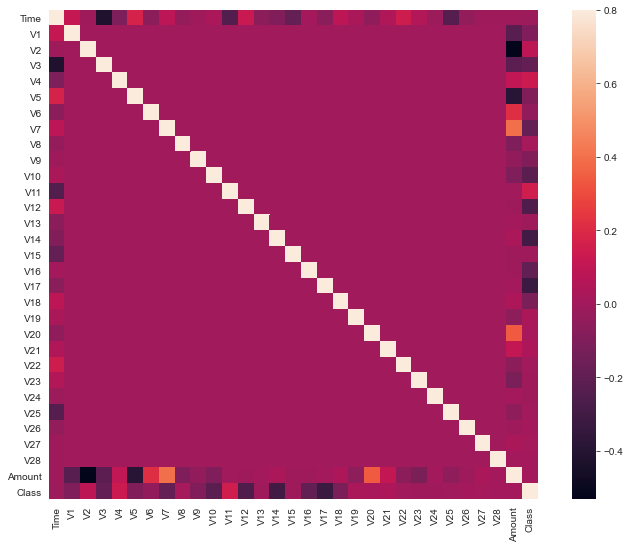

In [121]:
# Correlation matrix 

corrmat = data.corr() 
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show() 


In [17]:
# dividing the X and the Y from the dataset 

X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 
# getting just the values for the sake of processing 
 
xData = X.values 
yData = Y.values 


(284807, 30)
(284807,)


In [18]:
# Using Skicit-learn to split data into training and testing sets 

from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets 

xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42) 


In [25]:
# Building the Random Forest Classifier (RANDOM FOREST) 

from sklearn.ensemble import RandomForestClassifier 

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

# random forest model creation 

rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 

# predictions 

yPred = rfc.predict(xTest) 
acc = accuracy_score(yTest, yPred) 
prec = precision_score(yTest, yPred) 
rec = recall_score(yTest, yPred) 
f1 = f1_score(yTest, yPred) 
MCC = matthews_corrcoef(yTest, yPred)

print('Usiing Random Forest')
print("The accuracy is {}".format(acc)) 
print("The precision is {}".format(prec)) 
print("The recall is {}".format(rec)) 
print("The F1-Score is {}".format(f1)) 
print("The Matthews correlation coefficient is{}".format(MCC)) 



Usiing Random Forest
The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is0.8690748763736589


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model creation 

dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(xTrain, yTrain)

# prediction
dt_y_pred = dt.predict(xTest)

dt_con_matrix = confusion_matrix(yTest, dt_y_pred)
dt_acc = accuracy_score(yTest, dt_y_pred)
dt_prec = precision_score(yTest, dt_y_pred)
dt_rec = recall_score(yTest, dt_y_pred)
dt_f1 = f1_score(yTest, dt_y_pred)
dt_MCC = matthews_corrcoef(yTest, dt_y_pred)

print("Using Decision Tree")
print("The accuracy is {}".format(dt_acc)) 
print("The precision is {}".format(dt_prec)) 
print("The recall is {}".format(dt_rec)) 
print("The F1-Score is {}".format(dt_f1)) 
print("The Matthews correlation coefficient is{}".format(dt_MCC)) 

Using Decision Tree
The accuracy is 0.9991924440855307
The precision is 0.76
The recall is 0.7755102040816326
The F1-Score is 0.7676767676767676
The Matthews correlation coefficient is0.7673116100433675


In [24]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes model creation 

gnb = GaussianNB()
gnb.fit(xTrain, yTrain)

# Prediction
gnb_y_pred = gnb.predict(xTest)
gnb_con_matrix = confusion_matrix(yTest, gnb_y_pred)
gnb_acc = accuracy_score(yTest, gnb_y_pred)
gnb_prec = precision_score(yTest, gnb_y_pred)
gnb_rec = recall_score(yTest, gnb_y_pred)
gnb_f1 = f1_score(yTest, gnb_y_pred)
gnb_MCC = matthews_corrcoef(yTest, gnb_y_pred)

print("Using Naive Bays")
print("The accuracy is {}".format(gnb_acc)) 
print("The precision is {}".format(gnb_prec)) 
print("The recall is {}".format(gnb_rec)) 
print("The F1-Score is {}".format(gnb_f1)) 
print("The Matthews correlation coefficient is{}".format(gnb_MCC))

Using Naive Bays
The accuracy is 0.9930128857835048
The precision is 0.14622641509433962
The recall is 0.6326530612244898
The F1-Score is 0.2375478927203065
The Matthews correlation coefficient is0.3019617859258202


The model used is Random Forest classifier
The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is0.8690748763736589


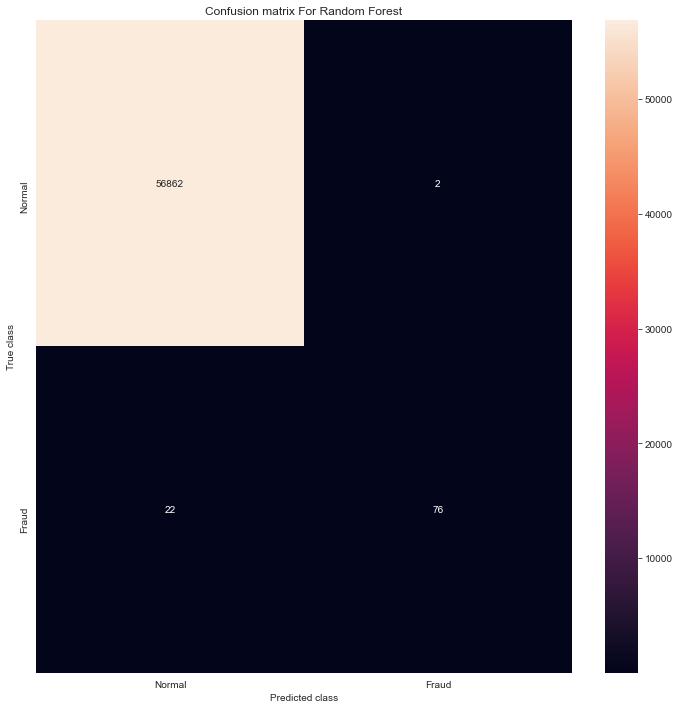

In [26]:
# printing the confusion matrix for Random Forest
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, yPred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, 
yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix For Random Forest") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 


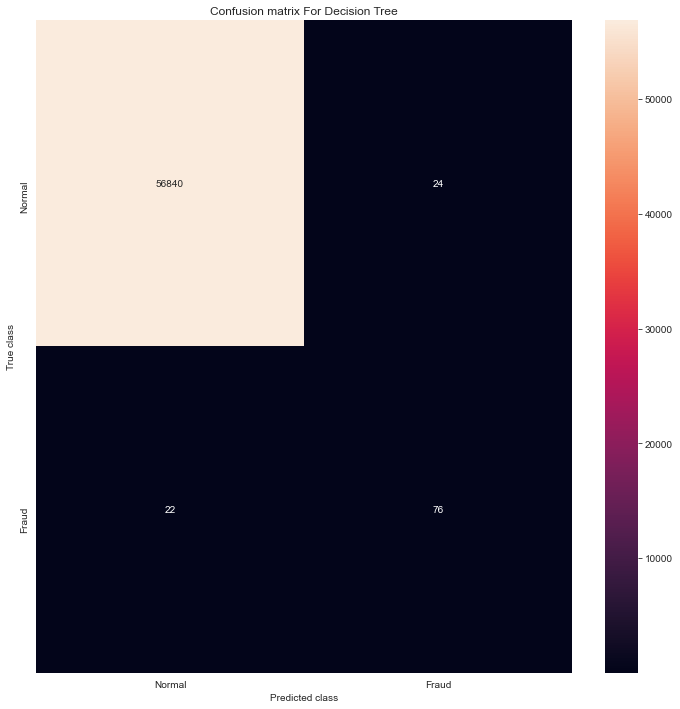

In [28]:
# Confusing Matrix for Decision Tree
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, dt_y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, 
yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix For Decision Tree") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

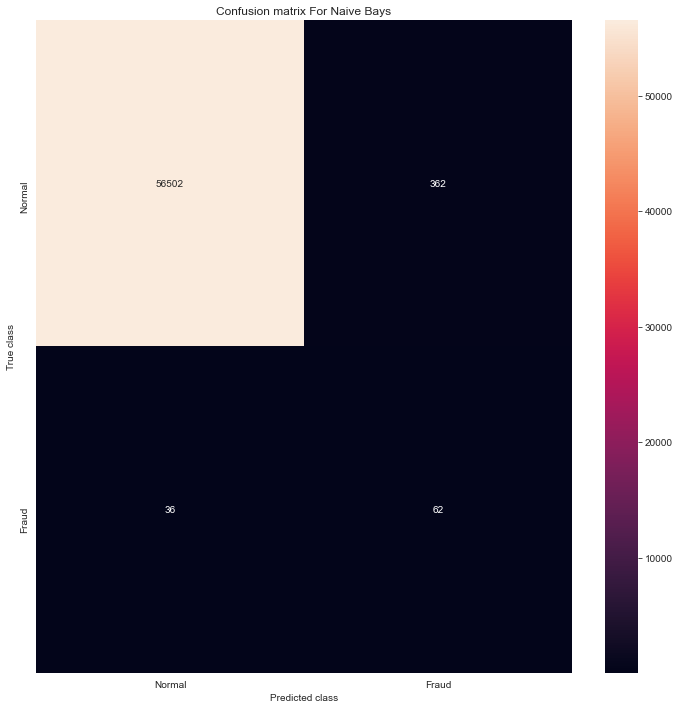

In [29]:
# Confusing Matrix for Naive Bays
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(yTest, gnb_y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS, 
yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix For Naive Bays") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 